# air_ARIMA 모델분석
 시계열 예측의 대표적 모델, 자기회귀차분이동평균모델, 아리마
 >In statistics and econometrics, and in particular in time series analysis, an autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model.
 - AR (Auto Regressive) - 자기회귀모델
 - I ( Integrated  ) - 차분
 - MA (Moving Average) - 이동평균모델

In [1]:
# !pip install pyramid-arima

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import sqrt
from pandas import datetime

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
from asset.config import *


# dir_work,
# dir_data,
# dir_data_collect,
# dir_data_realtime,
# dir_data_trash,
# dir_img,
# dir_img_heatmap,
# dir_img_nulschool,
# dir_img_plot_plot,
# dir_img_plot_scatter,
# dir_img_result,
# dir_img_test,



In [3]:
# 수집된 데이터의 가장 마지막 화일을 읽어온다.
file_name = os.listdir(dir_data_collect)[-1]    # ['_air_20190109_Wed_1700.csv']

df = pd.read_csv(dir_data_collect + f'/{file_name}')
series = df.PM10.dropna()      # 아리마는 공백이 있으면 안됨 (seq)

<Figure size 1080x576 with 0 Axes>

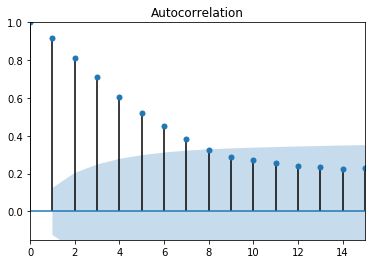

In [4]:
plt.figure(figsize=(15,8))

plot_acf(series)
plt.ylim(-0.15, 1.0)
plt.xlim(0, 15)
plt.show()

C:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


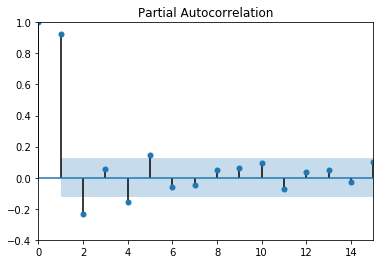

In [5]:
plot_pacf(series)
plt.xlim(0,15)
plt.ylim(-0.4, 1)
plt.show()

In [6]:
# split into train and test sets
X = series.values                    # 215개

train = X
test = X[-12:]

# train = X[:-100]
# test = X[-100:]

# test = [np.random.randint(0,80) for i in np.arange(12)]

history = [x for x in train]
predictions = list()

## ARIMA Model training loop
 - 아리마 차분설정 order=(5,2,0)
 - AR = 5, I= 2 차분, MA = 0

In [7]:
# walk-forward validation
for t in range(len(test)):
    
    # fit model
    model = ARIMA(history, order=(5,2,0))
    model_fit = model.fit()
    
    # one step forecast
    yhat = model_fit.forecast()[0]
    
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])

In [8]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE = %.3f' % rmse)

Test RMSE = 4.083


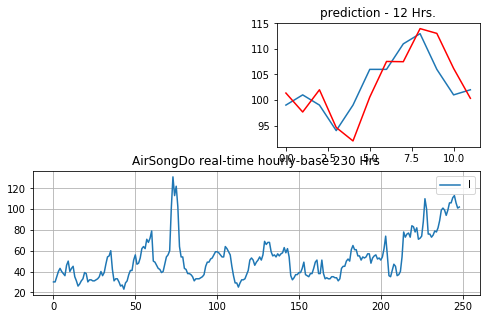

In [11]:
# plot forecasts against actual outcomes
plt.figure(figsize=(8,5))
plt.subplot(222)
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('prediction - 12 Hrs.')
# plt.show()

plt.subplot(212)
series.plot()
plt.legend('left center')
plt.grid(which='both')
plt.title('AirSongDo real-time hourly-base 230 Hrs')
plt.show()


## How to Tune ARIMA Parameters in Python
https://machinelearningmastery.com/tune-arima-parameters-python/

In [10]:
file_name

'_air_20190112_Sat_0900.csv'